In [ ]:
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.layers.recurrent import RNN, SimpleRNN, GRU, LSTM
from keras.activations import tanh, softmax
from keras.optimizers import RMSprop, Adam
from keras.losses import categorical_crossentropy
from keras.models import Sequential

from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

In [2]:
from IPython.display import SVG
import matplotlib.pyplot as plt
import numpy as np

In [3]:
BATCH_SIZE = 128
NUM_HIDDEN = 128
NUM_CLASSES = 10

# OPTIMIZER = Adam(lr=0.001) 
OPTIMIZER = RMSprop(lr=0.001) 
INPUT_SHAPE = (28, 28)
NUM_EPOCH = 30

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [7]:
model = Sequential()
model.add(LSTM(NUM_HIDDEN, input_shape=INPUT_SHAPE))
model.add(Dense(units=NUM_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=OPTIMIZER, loss=categorical_crossentropy, metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train,
                   batch_size=BATCH_SIZE, 
                   epochs=NUM_EPOCH,
                   verbose=1,
                   validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 19s 393us/step - loss: 0.7148 - acc: 0.7629 - val_loss: 0.2659 - val_acc: 0.9172
Epoch 2/30
48000/48000 [==============================] - 19s 389us/step - loss: 0.2140 - acc: 0.9335 - val_loss: 0.1803 - val_acc: 0.9438
Epoch 3/30
48000/48000 [==============================] - 18s 382us/step - loss: 0.1309 - acc: 0.9606 - val_loss: 0.1112 - val_acc: 0.9653
Epoch 4/30
48000/48000 [==============================] - 18s 381us/step - loss: 0.0939 - acc: 0.9711 - val_loss: 0.0804 - val_acc: 0.9758
Epoch 5/30
48000/48000 [==============================] - 19s 388us/step - loss: 0.0726 - acc: 0.9775 - val_loss: 0.0730 - val_acc: 0.9788
Epoch 6/30
48000/48000 [==============================] - 18s 373us/step - loss: 0.0599 - acc: 0.9816 - val_loss: 0.0687 - val_acc: 0.9793
Epoch 7/30
48000/48000 [==============================] - 18s 383us/step - loss: 0.0506 - acc: 0.9843 - val_loss: 0.

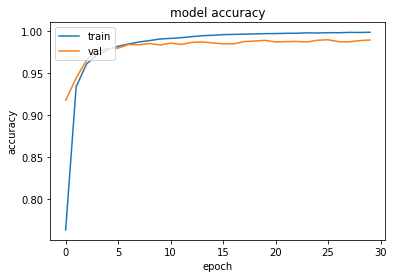

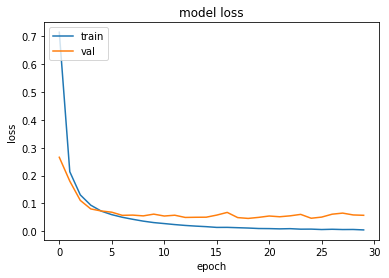

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 2s 240us/step
('Test score:', 0.06043236234358519)
('Test accuracy:', 0.9867)


In [12]:
def show_good_and_bad(x, y, preds):
    fig = plot.figure(figsize=(10,20))
    for i in range(10):
        c = 1
        for (image, label, pred) in zip(x, y, preds):
            prediction, actual = np.argmax(pred), np.argmax(label)

            if prediction != i:
                continue

            if (c < 4 and i == actual) or (c >= 4 and i != actual):
                subplot = fig.add_subplot(10,6, i*6+c)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.set_title('pred %d / act %d' % (prediction, actual))
                subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,cmap=plot.cm.gray_r)

                c += 1
                if c > 6:
                    break

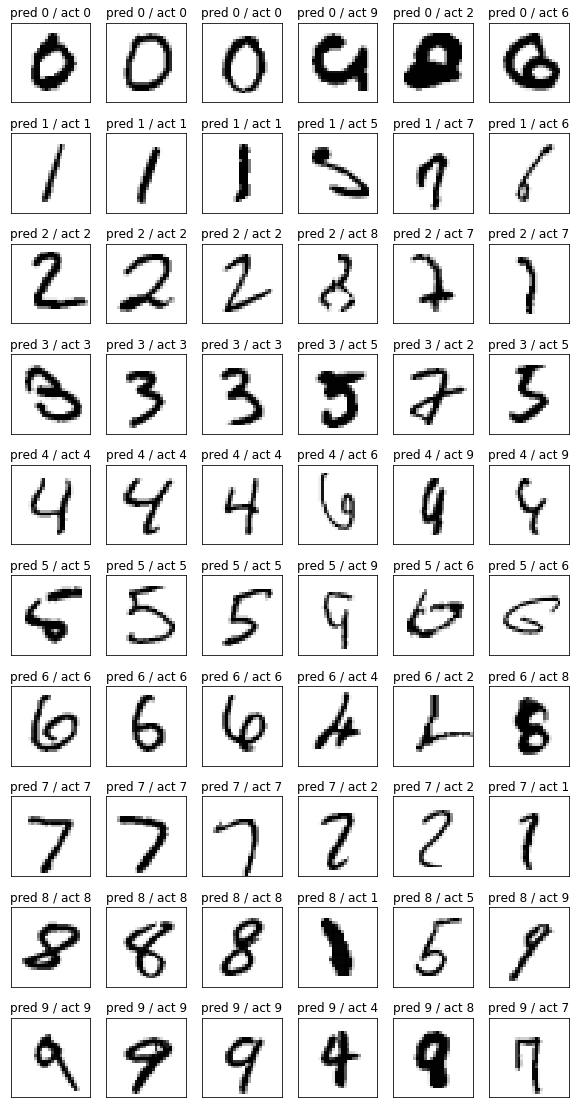

In [13]:
import matplotlib.pyplot as plot
%matplotlib inline

predictions = model.predict(x=X_test)
show_good_and_bad(X_test, Y_test, predictions)